# Python - User Defined Functions

Python has several functions that are built-in. These functions perform a predefined task and may, as per requirement, be called upon in any program. However, you can specify one if you don't find an acceptable built-in function to suit your purpose. Below is a sample syntax of how to define your own functions

**Advantages of user-defined functions**
- User-defined functions help to decompose a large program into small segments which makes program easy to understand, maintain and debug.
- If repeated code occurs in a program. Function can be used to include those codes and execute when needed by calling that function.
- Programmars working on large project can divide the workload by making different functions.

In [8]:
def function_name (parameter_one, parameter_two, parameter_n):
  # logic here
  return

# Functions for Handling Missing Values

#### Total & percentage of missing data in each column

In [1]:
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

#### List of columns that have missing values beyond a threshold

In [2]:
def view_columns_w_many_nans(df, missing_percent):
    '''
    Checks which columns have over specified percentage of missing values
    Takes df, missing percentage
    Returns columns as a list
    '''
    mask_percent = df.isnull().mean()
    series = mask_percent[mask_percent > missing_percent]
    columns = series.index.to_list()
    print(columns) 
    return columns

#### Drop columns w/ missing values beyond threshold

In [4]:
def drop_columns_w_many_nans(df, missing_percent):
    '''
    Takes df, missing percentage
    Drops the columns whose missing value is bigger than missing percentage
    Returns df
    '''
    series = view_columns_w_many_nans(df, missing_percent=missing_percent)
    list_of_cols = series.index.to_list()
    df.drop(columns=list_of_cols)
    print(list_of_cols)
    return df

Missing values can be handled by 
- [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer)
- [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer)

# Changing Data Types

In [9]:
def categorical_to_ordinal_transformer(categories):
    '''
    Returns a function that will map categories to ordinal values based on the
    order of the list of `categories` given. Ex.

    If categories is ['A', 'B', 'C'] then the transformer will map 
    'A' -> 0, 'B' -> 1, 'C' -> 2.
    '''
    return lambda categorical_value: categories.index(categorical_value)

# Data encoding

In [ ]:
def simple_preprocessing(dataframe, train=True):
    le = LabelEncoder()
    X = dataframe.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    X['Age'] = X['Age'].fillna(value=X['Age'].mode()[0])
    X['Embarked'] = le.fit_transform(X['Embarked'].fillna(value=X['Embarked'].mode()[0]))
    X['Sex'] = np.where(X['Sex'] == 'male', 1, 0)
    
    if train:
        X = X.drop(['Survived'], axis=1)
        y = np.where(dataframe['Survived'] == 1, 'Alive', 'Dead')
        y = pd.get_dummies(y, columns=['Survived'])
        return X, y
    else:
        return X

# Function for Visualizations

#### Summary of Categorical data

- Count, mean, std, min, max, and quartiles for numerical data or the count for non-numerical data, special, top class, and top class frequency. 
- Class frequencies of the column in question if the verbose value is set to True 
- Bar graph of the number of each class in the column concerned

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

#### Quantitative Summary with box plot
- A modification of above function

In [2]:
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

#### Correlation Analysis

In [5]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable 
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

#### Histogram / distribution

In [7]:
def histograms_numeric_columns(df, numerical_columns):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

In [29]:
def histogram_modified():

    bins = np.arange(-60, 60, 2.5)
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 
    
    # plot histograms
    plt.hist(data1, bins=bins, 
             alpha=0.3,        # transparency
             label='class 1')
    plt.hist(data2, bins=bins, 
             alpha=0.3,        # transparency
             label='class 2')
    
    # axis formatting
    plt.ylim([0, 110])
    plt.xlim([min(data1+data2)-5, max(data1+data2)+5])

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    # labels    
    plt.xlabel('variable X')
    plt.ylabel('count')
    plt.legend(loc='upper right', fancybox=True)

    # raised title
    plt.text(15, 120, 'Modified',
         horizontalalignment='center',
         fontsize=18)    
    
    plt.show()

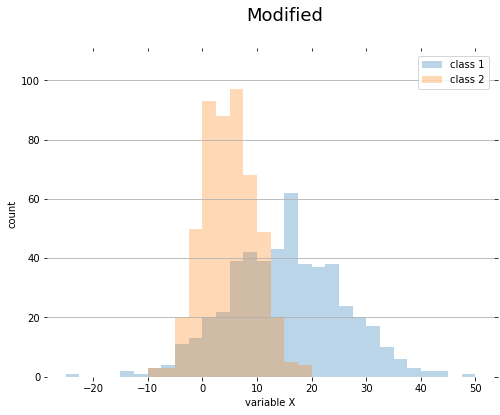

In [39]:
import random
data1 = [random.gauss(15,10) for i in range(500)]  
data2 = [random.gauss(5,5) for i in range(500)]  
histogram_modified()

#### Default Errorbar Plot

In [25]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

In [13]:
def errorbar_default():

    # Data
    data = [1, 1.5, 1.2]
    std_devs = [0.15, 0.25, 0.12]

    # X axis positions
    x_pos = range(len(data))

    for d, std, x in zip(data, std_devs, x_pos):
        plt.errorbar(x=x, y=d, yerr=std, fmt='o')

    # setting axis limits   
    plt.xlim([min(x_pos)-1, max(x_pos)+1])    
    plt.ylim([min(data)*0.7, max(data)*1.3])  

    # setting labels and titles   
    plt.ylabel('x label')
    plt.title('Matplotlib default')

    plt.legend(['X1', 'X2', 'X3'], loc='upper right')

    plt.show()

In [14]:
# modified errobar plot
def errorbar_modified():

    # Data
    data = [1, 1.5, 1.2]
    std_devs = [0.15, 0.25, 0.12]

    # X axis positions
    x_pos = range(len(data))

    colors = ['lightblue', 'pink', 'lightgreen']

    fig = plt.gca()
    ax = plt.subplot(111)  

    # draw plots
    for d, std, col, x in zip(data, std_devs, colors, x_pos):
        plt.errorbar(x=x, y=d, yerr=std, fmt='o', color=col, ecolor='black')
    
    # setting axis limits    
    plt.xlim([min(x_pos)-1, max(x_pos)+1])    
    plt.ylim([min(data)*0.7, max(data)*1.3])  
    
    # setting labels and titles    
    plt.ylabel('x label')
    plt.text(1, 2, 'Modified',
         horizontalalignment='center',
         fontsize=14)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True)

    plt.legend(['X1', 'X2', 'X3'], loc='upper right', fancybox=True, numpoints=1)
    
    plt.tight_layout()
    plt.show()

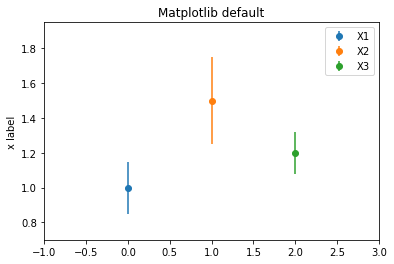

In [15]:
errorbar_default()

<ipython-input-14-f2dd4430cd09>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


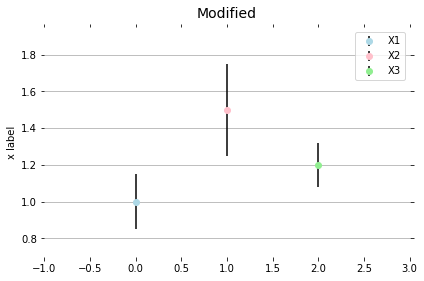

In [16]:
errorbar_modified()

#### Box Plot

In [17]:
def boxplot_default():

    fig = plt.figure(figsize=(8,6))

    plt.boxplot(data, 
            notch=False, # box instead of notch shape 
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])
    plt.title('Matplotlib default')
    plt.show()

In [18]:
def boxplot_modified():
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    bplot = plt.boxplot(data, 
            notch=True,          # notch shape 
            vert=True,           # vertical box aligmnent
            sym='ko',            # red circle for outliers
            patch_artist=True,   # fill with color
            )   

    # choosing custom colors to fill the boxes
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # modifying the whiskers: straight lines, black, wider
    for whisker in bplot['whiskers']:
        whisker.set(color='black', linewidth=1.2, linestyle='-')    
    
    # making the caps a little bit wider 
    for cap in bplot['caps']:
        cap.set(linewidth=1.2)
    
    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])

    # raised title
    plt.text(2, 9, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    plt.tight_layout()
    plt.show()

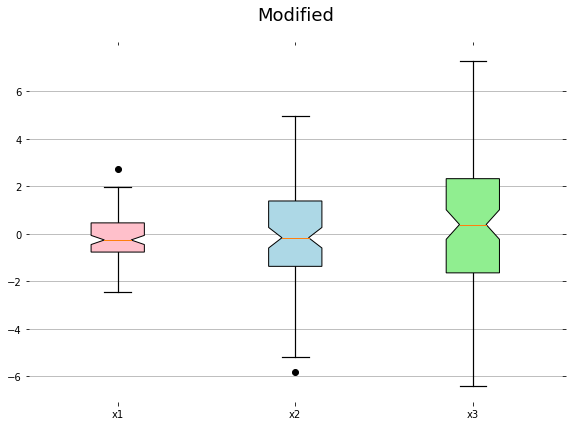

In [26]:
boxplot_modified()

In [27]:
def barplot_default():   

    # input data
    mean_values = [1, 2, 3]
    variance = [0.2, 0.4, 0.5]
    bar_labels = ['bar 1', 'bar 2', 'bar 3']

    fig = plt.figure(figsize=(6,4))

    # plot bars
    x_pos = list(range(len(bar_labels)))
    plt.bar(x_pos, mean_values, yerr=variance, align='center')


    # set axes labels and title
    plt.ylabel('variable y')
    plt.xticks(x_pos, bar_labels)
    plt.title('Matplotlib default')

    plt.show()

#### Bar Plot

In [28]:
def barplot_modified():

    # input data
    mean_values = [1, 2, 3]
    variance = [0.2, 0.4, 0.5]
    bar_labels = ['bar 1', 'bar 2', 'bar 3']

    fig = plt.figure(figsize=(6,4))
    ax = plt.subplot(111) 
    
    # plot bars
    x_pos = list(range(len(bar_labels)))
    plt.bar(x_pos, mean_values, yerr=variance, 
            ecolor='black', # black error bar color
            alpha=0.5,      # transparency
            width=0.5,      # smaller bar width
            align='center')

    # set height of the y-axis
    max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
    plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    # set axes labels and title
    plt.ylabel('variable y')
    plt.xticks(x_pos, bar_labels)
    
    plt.text(1, 4, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    
    
    plt.tight_layout()
    plt.show()

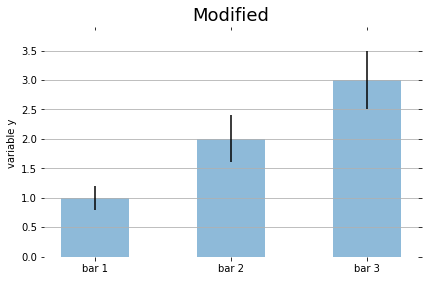

In [35]:
barplot_modified()

#### Pie Chart

In [30]:
def piechart_modified():

    plt.pie(
        (10,5),
        labels=('spam','ham'),
        shadow=True,
        colors=('lightskyblue', 'yellowgreen'),
        explode=(0,0.15), # space between slices 
        startangle=90,    # rotate conter-clockwise by 90 degrees
        autopct='%1.1f%%',# display fraction as percentage
        )
    plt.legend(fancybox=True)
    plt.axis('equal')     # plot pyplot as circle
    plt.tight_layout()
    plt.title('Modified')
    plt.show()

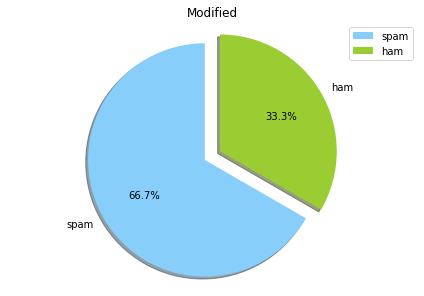

In [32]:
piechart_modified()

#### Violin Plot

In [31]:
def violin_modified():
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    vplot = plt.violinplot(data,
               showmeans=False,
               showmedians=True,
               showextrema=False
               )

    # choosing custom colors to fill the boxes
    colors = ['red', 'blue', 'green']
    for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)


    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])

    # raised title
    plt.text(2, 9, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    plt.tight_layout()
    plt.show()

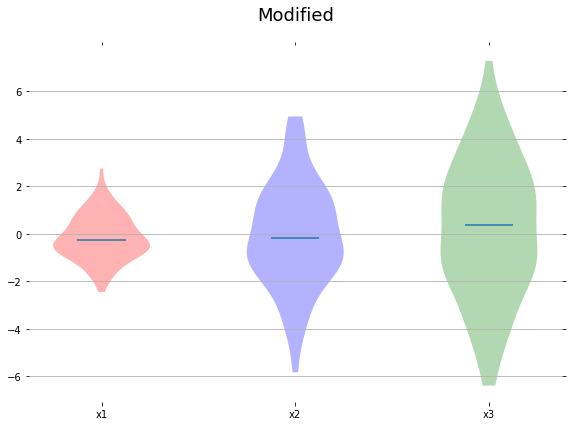

In [33]:
violin_modified()

For more functions/references check below links

- [Python UDF](https://github.com/Rajesh-ML-Engg/Deep_Dive_in_ML_Python/blob/master/Blog-6/Blog_6.ipynb)
- [EDA](https://github.com/FredaXin/blog_posts/blob/master/creating_functions_for_EDA.md)